<a href="https://colab.research.google.com/github/lingqinlq/Cohort-Analysis/blob/main/Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

## Dataset loading and cleaning

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
# Loading Dataset
file_path = "/content/drive/MyDrive/CVproject/CohortAnalysis/KPMG_VI_New_raw_data_update_final.xlsx"
transaction_df = pd.read_excel(file_path,'Transactions')

In [3]:
# View data
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [4]:
# Set first column as column name
transaction_df.columns = transaction_df.iloc[0]

In [5]:
# drop first column
transaction_df.drop(index=transaction_df.index[0],axis=0,inplace=True)
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [6]:
# Overview of the variables in the dataset
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


Highlights:

1. Customer ID 2183 placed 14 orders and is the top purchaser in our store.
2. On February 14, 2017, there were 82 orders placed, marking it as the day with the most daily transaction orders.
3. There are a few canceled orders.
4. The brand Solex is the most popular brand in our store
5. The Standard product line has the highest sales, with the medium class being the top-selling class and medium being the most frequently sold product size.
6. The most in-demand product is priced at \$2091 and costs \$388.92 to produce, giving us a profit of \$1702.55.

In [7]:
transaction_df[transaction_df['order_status'] != 'Approved']
# 179 rows out of 20000 rows are cancelled order data

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
43,43,76,488,2017-03-17 00:00:00,False,Cancelled,WeareA2B,Standard,low,medium,642.31,513.85,41922
139,139,32,2073,2017-03-25 00:00:00,False,Cancelled,Giant Bicycles,Standard,high,medium,1179,707.4,36833
250,250,48,1454,2017-11-25 00:00:00,False,Cancelled,WeareA2B,Standard,medium,medium,1762.96,950.52,35470
255,255,67,2801,2017-04-01 00:00:00,True,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,38647
584,584,43,1019,2017-09-13 00:00:00,True,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,34071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19406,19406,79,1860,2017-05-29 00:00:00,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42218
19410,19410,79,1771,2017-01-15 00:00:00,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42226
19823,19823,3,2312,2017-12-02 00:00:00,False,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,36361
19958,19958,56,2013,2017-06-04 00:00:00,True,Cancelled,OHM Cycles,Standard,medium,medium,183.86,137.9,34170


### Data cleaning - checking and working with missing value


In [8]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [9]:
# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())

1542


In [10]:
# Check blank space
transaction_df.applymap(lambda x:x=="").sum().sum()

0

In [11]:
# Replace the " "s with NaN
# transaction_df = transaction_df.replace(" ",np.NaN)

In [12]:
# Count NaNs
transaction_df.isnull().values.sum()

1542

In [13]:
# Treat missing values of numerical variables with mean
# Treat missing values of non-numerical variables with the most frequent value
for col in transaction_df.columns:
  if transaction_df[col].dtypes == 'object':
      transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])
# Check the number of NaNs to verify
transaction_df.isnull().values.sum()
# All missing values filled

0

In [14]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

Here, we can see that we have 1542 null values, which we treated with mean as well as most frequent values as per datatype. Also, we correct datatypes for each variables. Now, as we have completed our data cleaning and understanding, we will commence the Exploratory Data Analysis (EDA) and Cohort Analysis.

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Order Types')

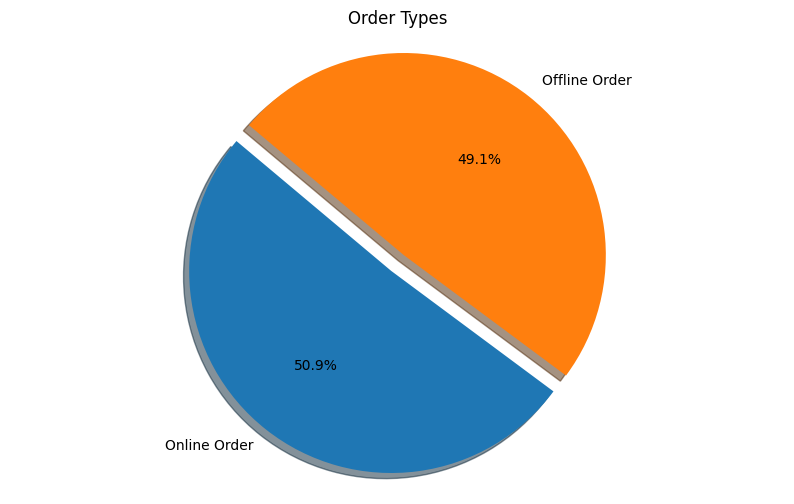

In [15]:
# Revenue of online and offline orders
online_order_count = transaction_df['online_order'].sum()
total_orders = len(transaction_df)
offline_order_count = total_orders - online_order_count

sizes = [online_order_count, offline_order_count]
labels = ['Online Order', 'Offline Order']
explode = (0.1, 0)  # Only explode the 'Online Order' slice

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Order Types')


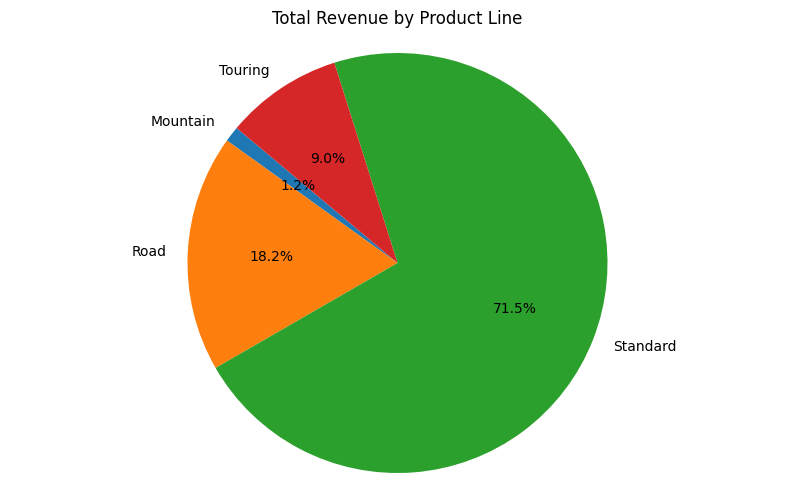

In [16]:
# Revenue of each product line
brand_revenue = transaction_df.groupby(['product_line']).sum(numeric_only=True)['list_price'].reset_index()

plt.figure(figsize=(10, 6))
plt.pie(brand_revenue['list_price'], labels=brand_revenue['product_line'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Revenue by Product Line')
plt.show()

In [17]:
#most profit line
brand_cost = transaction_df.groupby(['product_line']).sum(numeric_only=True)['standard_cost'].reset_index()
brand_revenue['total_cost'] = brand_cost['standard_cost']
brand_revenue['profit'] = brand_revenue['list_price'] - brand_revenue['total_cost']
brand_revenue

,product_line,list_price,total_cost,profit
0,Mountain,265870.72,2.250913e+05,4.077939e+04
1,Road,4041528.14,2.641131e+06,1.400397e+06
2,Standard,15849851.20,7.572611e+06,8.277240e+06
3,Touring,1999338.92,6.491811e+05,1.350158e+06


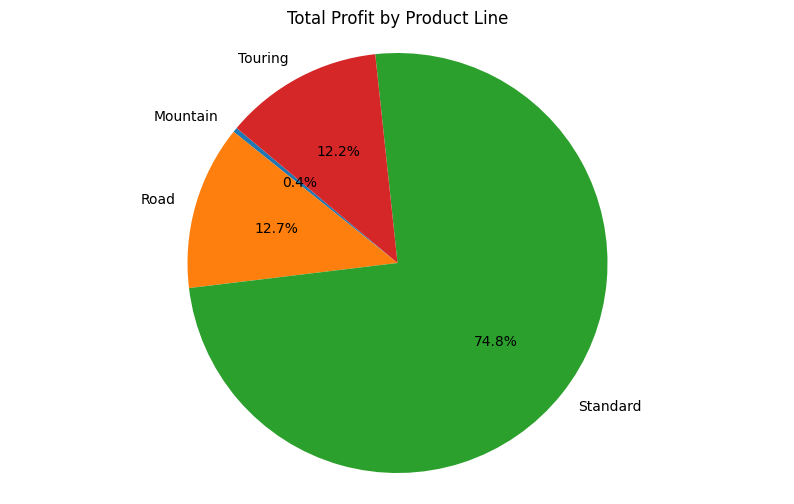

In [18]:
plt.figure(figsize=(10, 6))
plt.pie(brand_revenue['profit'], labels=brand_revenue['product_line'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Profit by Product Line')
plt.show()

Text(0.5, 1.0, 'Density of List Price')

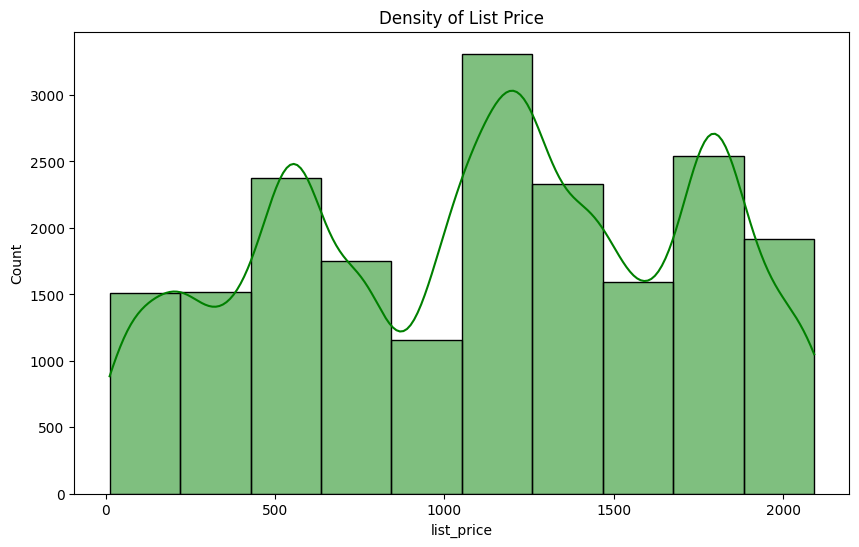

In [19]:
# Density of list_price
plt.figure(figsize=(10, 6))
sns.histplot(transaction_df['list_price'], bins=10, kde=True, color='g')
plt.title('Density of List Price')

Notes: Products priced from \$1100 to \$1490 generally have the highest sales.

In [20]:
# revenue of each month
# Convert the 'date' column to datetime if it isn't already
#transaction_df['product_first_sold_date'] = pd.to_datetime(transaction_df['product_first_sold_date'])
# Extract month and add it as a new column
transaction_df['transaction_month'] = transaction_df['transaction_date'].dt.month
# Aggregate data by month
monthly_revenue = transaction_df.groupby(['transaction_month','online_order']).sum(numeric_only=True)['list_price'].reset_index()
monthly_revenue

,transaction_month,online_order,list_price
0,1,False,898539.26
1,1,True,967520.00
2,2,False,854718.13
3,2,True,943727.70
4,3,False,937459.85
5,3,True,880157.65
6,4,False,871976.45
7,4,True,971032.73
8,5,False,948479.41
9,5,True,960243.63


Text(0, 0.5, 'Total Revenue')

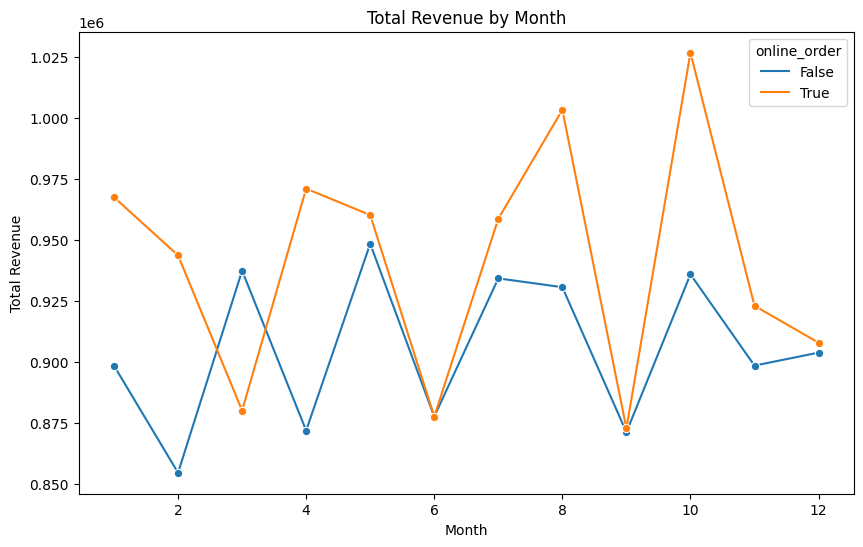

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='transaction_month', y='list_price', hue='online_order', data=monthly_revenue, marker="o")
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

Notes: For the majority of the year, online sales surpass offline sales.

Text(0.5, 1.0, 'Total Revenue by Brand and Order Method')

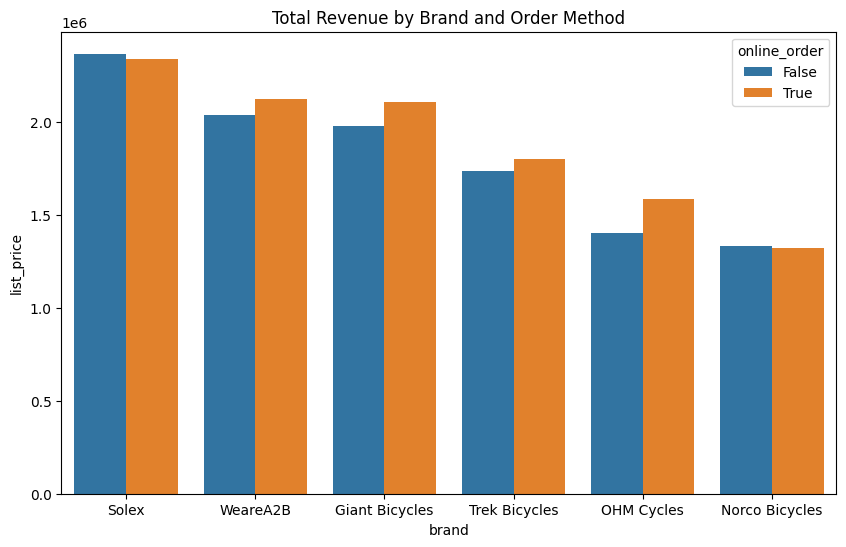

In [22]:
plt.figure(figsize=(10, 6))
# Compute total revenue for each brand and sort brands by this total
sorted_brands = transaction_df.groupby('brand')['list_price'].sum().sort_values(ascending=False).index

# Plot using this order
ax = sns.barplot(x='brand', y='list_price', hue='online_order', data=transaction_df, estimator=sum, errorbar=None, order=sorted_brands)
ax.set_title('Total Revenue by Brand and Order Method')

<Figure size 1000x600 with 0 Axes>

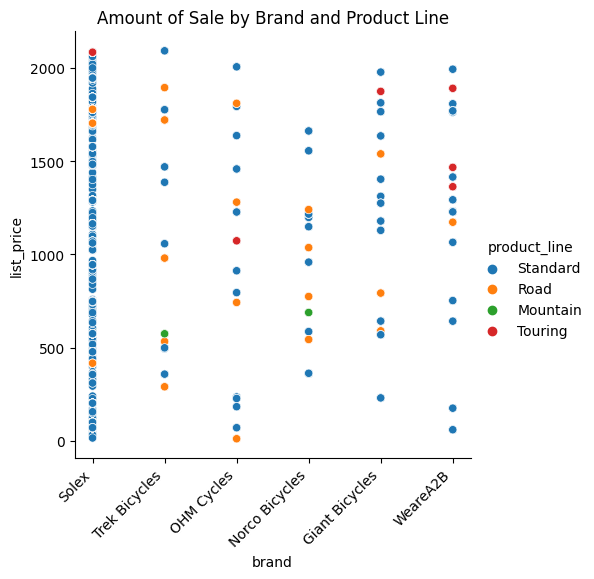

In [23]:
plt.figure(figsize=(10, 6))
sns.relplot(data=transaction_df, x="brand", y="list_price", hue="product_line")

# Rotate x-axis labels
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Amount of Sale by Brand and Product Line');

Notes: Our top-selling brand, Solex, has online order revenue that is marginally less than its offline order revenue.

Text(0.5, 1.0, 'Correlation Heatmap')

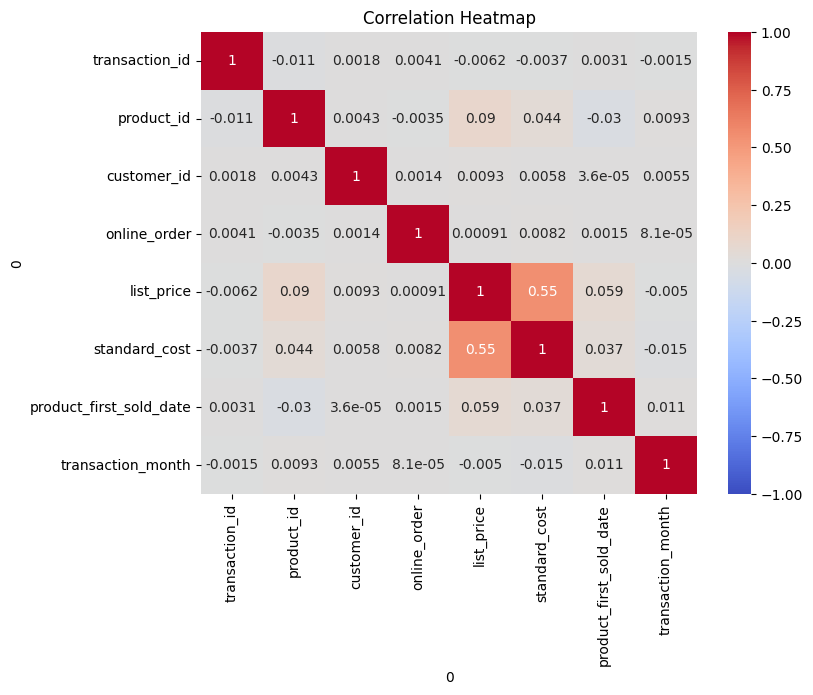

In [24]:
# Calculate correlation matrix
corr_matrix = transaction_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

Notes:

Highly positive correlated variables: List_price and standard_cost

Weekly positive corrleated variables: list_price and product_id; standard_cost and product_id

## Cohorts Analysis

Cohort analysis allows us to examine the behavior of user groups over time. In this specific analysis, we've segmented our users into monthly cohorts based on when they first engaged with our platform or product. Our primary focus is to understand how well we retain users month-over-month.


###Retention Rate in Percentage: Monthly Cohorts

Assigned the cohorts and calculated the monthly offset
Calculating the time offset for each transaction allows us to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [25]:
# For performing the Time cohorts, this function will parse the date to get the month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Get month from 'transaction_date' column and store in 'trans_month' column
transaction_df['trans_month'] = transaction_df['transaction_date'].apply(get_month)
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  bool          
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [26]:
# get the first purchase month for each customer and store in 'cohort_month'
transaction_df['cohort_month_date'] = transaction_df.groupby('customer_id')['trans_month'].transform('min')
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,trans_month,cohort_month_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2,2017-02-01,2017-02-01
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,5,2017-05-01,2017-01-01
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,10,2017-10-01,2017-01-01
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,8,2017-08-01,2017-02-01
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,10,2017-10-01,2017-01-01


In [27]:
# Calculate the monthly offsets
# define a function to capture the interger value of years, months, and days for 'transaction_month' and 'cohort_month'
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

transaction_year, transaction_month,_ = get_date_int(transaction_df, 'trans_month')
cohort_year, cohort_month,_ = get_date_int(transaction_df, 'cohort_month_date')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately, then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [28]:
# get the difference in year
years_diff = transaction_year - cohort_year
# get the difference in month
months_diff = transaction_month - cohort_month
# get cohort index
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """
transaction_df['CohortIndex'] = years_diff * 12 + months_diff + 1
transaction_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,transaction_month,trans_month,cohort_month_date,CohortIndex
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,2,2017-02-01,2017-02-01,1
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,5,2017-05-01,2017-01-01,5
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,10,2017-10-01,2017-01-01,10
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,8,2017-08-01,2017-02-01,7
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,10,2017-10-01,2017-01-01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823,6,2017-06-01,2017-01-01,6
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560,11,2017-11-01,2017-01-01,11
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410,4,2017-04-01,2017-04-01,1
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216,7,2017-07-01,2017-02-01,6


In [29]:
# Counting monthly active user from each chort
# Counting number of unique customer Id's falling in each group of 'cohort_month_date' and 'CohortIndex'
cohort_data = transaction_df.groupby(['cohort_month_date', 'CohortIndex']).nunique()['customer_id'].reset_index()
cohort_data

,cohort_month_date,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,8
75,2017-11-01,1,13
76,2017-11-01,2,5


In [30]:
# Create pivot table
cohort_counts = cohort_data.pivot(index='cohort_month_date', columns= 'CohortIndex',values = 'customer_id')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month_date,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,122.0,45.0,44.0,47.0,46.0,46.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Calculate retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention_number = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and rounding off
retention_rate = retention_number.round(3)*100
retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month_date,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
retention_rate.index = retention_rate.index.strftime('%Y-%m')
retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month_date,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


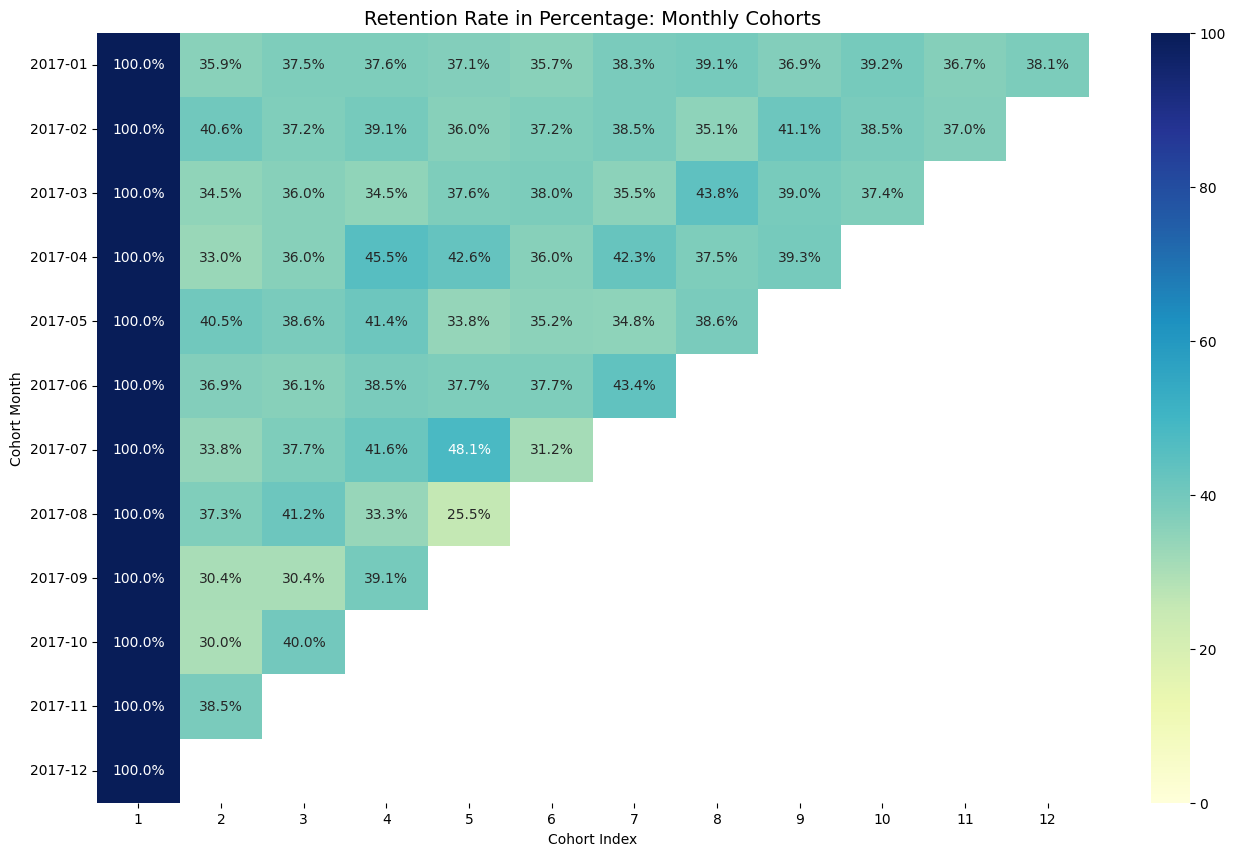

In [33]:
# Create a percentage formatter function
percentage_formatter = lambda x: f'{x:.1f}%'
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Retention Rate in Percentage: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention_rate, annot = retention_rate.applymap(percentage_formatter),vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation=360)
plt.show()



Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values.

**Cohorts (Rows)**: "Each row represents a distinct monthly cohort of users.
For instance, the first row represents users who first engaged with us in January."



**Time Periods (Columns)**: "The columns represent the months elapsed since the cohort's first engagement. So, the first column represents the percentage of customer made first pruchase in January so that it's 100%. The second column represents the percentage of January's cohort that returned in February,and so on."

<br>

Key Findings:


1. The overall retention rate falls under 50%, indicating there's room for improvement in reducing our churn rate and enhancing customer loyalty.

2. The retention rate varies significantly across cohorts, with some cohorts having higher or lower retention rates than others. For example, the cohort from Feburary has the highest retention rate, while the cohort from October has the lowest retention rate. This suggests that there are some factors that influence customer behavior and satisfaction depending on when they joined your product or service.

3. The retention rate displays a periodic trend for several months throughout the year. Specifically, cohorts from January to July experience a surge in retention rates during June and July. This pattern implies that certain seasonal factors or marketing efforts during these months may be effectively driving customer engagement and loyalty.


4. The most noticeable decline appears in the 5-month to 6-month period for the July cohort, with a drop of about 17%. This suggests potential challenges or a decrease in the perceived value by customers during this phase. We could deep futher with Root Cause Analysis.



### Root Cause Analysis

In [34]:
# get data of cohort month July, cohort index 5
customerbehavior1 = transaction_df[(transaction_df['cohort_month_date']=='2017-07-01') & (transaction_df['CohortIndex']==5) ]
# get data of cohort month August, cohort index 5
customerbehavior2 = transaction_df[(transaction_df['cohort_month_date']=='2017-08-01') & (transaction_df['CohortIndex']==5) ]

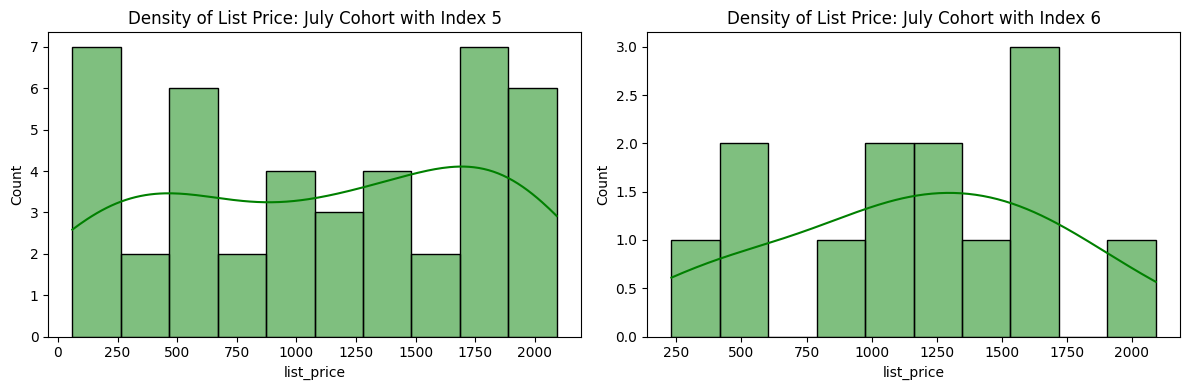

In [35]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First plot
sns.histplot(data=customerbehavior1['list_price'], bins=10, kde=True, color='g', ax=axes[0])
axes[0].set_title('Density of List Price: July Cohort with Index 5')

# Secound plot
sns.histplot(customerbehavior2['list_price'], bins=10, kde=True, color='g',ax=axes[1])
axes[1].set_title('Density of List Price: July Cohort with Index 6')

plt.tight_layout() # To ensure that the plots don't overlap

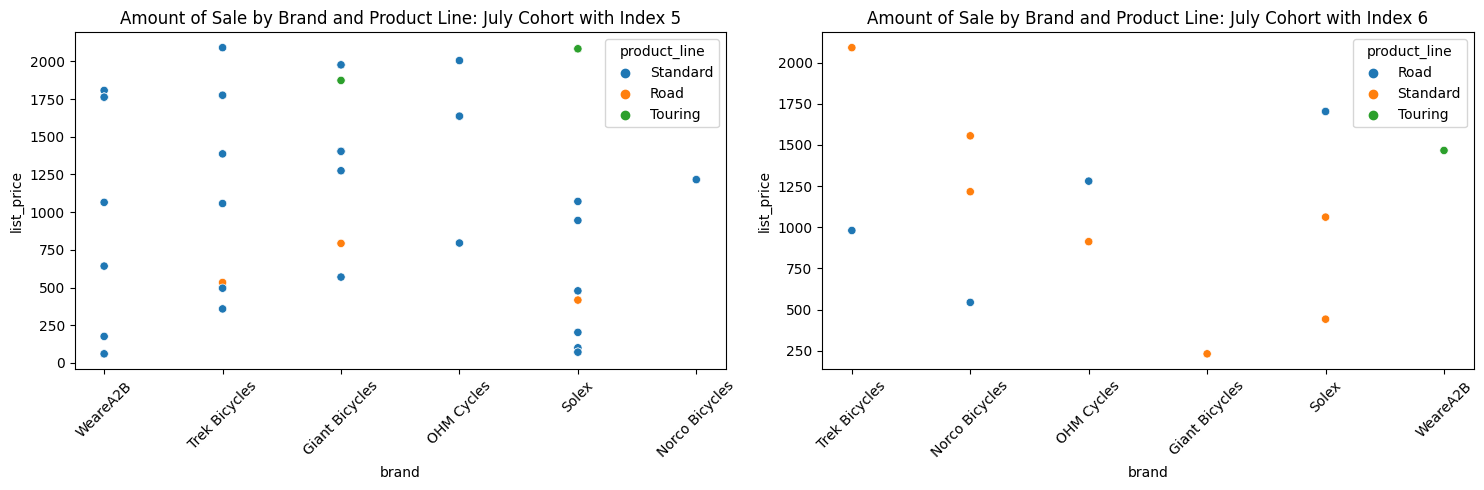

In [36]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# First plot
sns.scatterplot(data=customerbehavior1, x="brand", y="list_price", hue="product_line", ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Amount of Sale by Brand and Product Line: July Cohort with Index 5')

# Second plot
sns.scatterplot(data=customerbehavior2, x="brand", y="list_price", hue="product_line", ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Amount of Sale by Brand and Product Line: July Cohort with Index 6')

# Adjust layout to ensure that the plots don't overlap and are displayed nicely
plt.tight_layout()

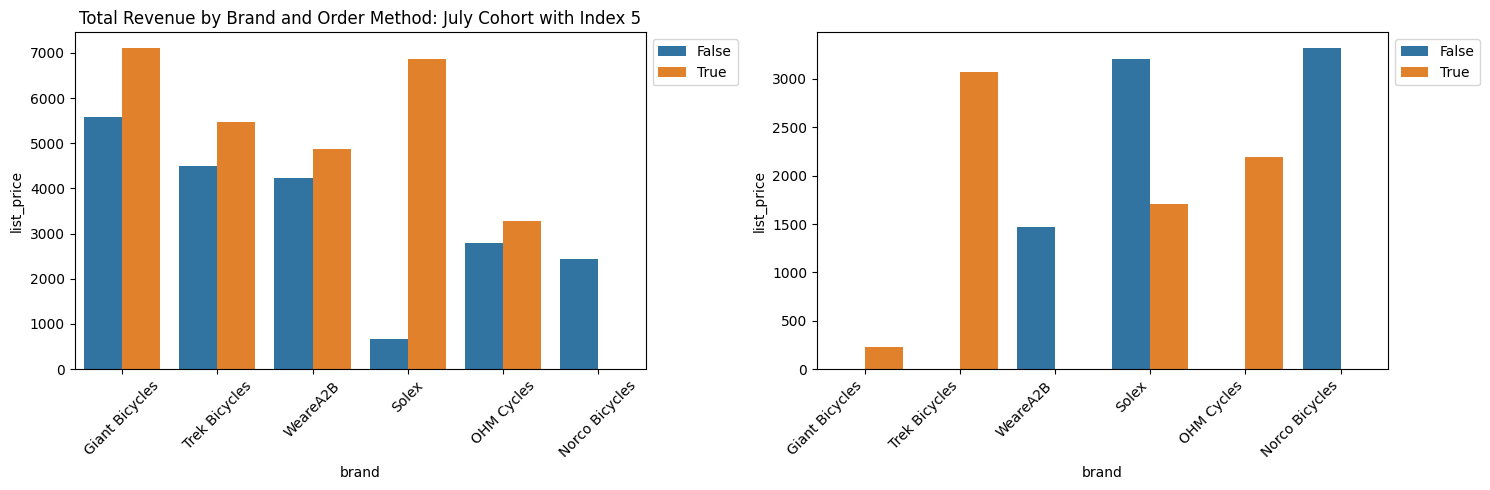

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Compute total revenue for each brand and sort brands by this total
sorted_brands1 = customerbehavior1.groupby('brand')['list_price'].sum().sort_values(ascending=False).index

# First plot
sns.barplot(x='brand', y='list_price', hue='online_order', data=customerbehavior1, estimator=sum, errorbar=None, order=sorted_brands1, ax=axes[0])
axes[0].set_title('Total Revenue by Brand and Order Method: July Cohort with Index 6')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second plot
sns.barplot(x='brand', y='list_price', hue='online_order', data=customerbehavior2, estimator=sum, errorbar=None, order=sorted_brands1, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].set_title('Total Revenue by Brand and Order Method: July Cohort with Index 5')

plt.tight_layout()

From the above charts, we can see that:

There's been a decline in the buying behavior of both high-priced and low-priced items.Sales of standard products have seen a reduction. Solex, the top-selling brand in the shop, has experienced a noticeable drop in online sales, while three other brands lack offline sales entirely.

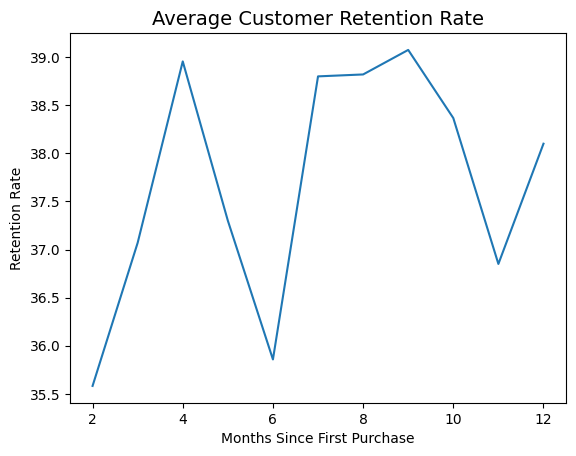

In [38]:
# Average churn rate for the customers based on the cohort analysis
average_percent_of_customers = retention_rate.mean(axis=0).values[1:]
month_since_first_purchase = retention_rate.columns[1:]

plt.plot(month_since_first_purchase, average_percent_of_customers)
plt.ylabel('Retention Rate')
plt.xlabel('Months Since First Purchase')
plt.title('Average Customer Retention Rate', fontsize = 14);

From the above chart, we can see that:

1. The customer retention rate consistently hovers between 35.5% and 39%.

2. Approximately 39% of customers make repeat purchases at the peak at 4 months, and this drops to its lowest at around 35.7% at 6 months.

3. After that, it remains fairly stable between 37% to 39%.

Possible reasons include:

1. Bike shop's seasonal promotional activities;

2. Bicycle parts replacement and upgrades in a regular basis;

3. Changes in customers' riding habits.

## Strategy & Future Analysis

Stragegy


Given the observed 4-monthly decline in retention rates, we suggest promoting subscriptions to our website and providing discounts to bolster customer loyalty. The discount structure could be tailored based on a set standard, targeting both premium and budget-friendly products. As Solex is our top-selling brand, a collaboration for marketing campaigns and exclusive promotions could be beneficial. This partnership might also allow us to secure better pricing advantages.

Futhermore, cultivate a community centered on bicycles using social media platforms and related events. Provide educational sessions, including tutorials and webinars to help customers maximize the benefits of the product or service. Ensure clients are well-informed about all the available products that they might have overlooked.

<br>

For the future Analysis, a direction is to work with other department to gather more data and identify causes:



*   Product Quality: Are there products that are being returned often or have negative reviews?
*   Customer Service: Are customers having a bad shopping experience?
*   Usability: Is the shop's website/app user-friendly?
*   Marketing: Were there any misleading marketing campaigns that could have set wrong expectations?
*   Price: Are products priced competitively?
*   External Factors: Are there external events or market changes influencing the shopping behavior?

<br>

Other analysis we could do:

* A/B Testing: If a specific part of the shopping experience might be the cause, conduct A/B tests to validate. A/B Tesing also can help analyze which marketing campaigns are effective and why.

* Machine Learning: Using K-means clustering, Hierarchical clustering, DBSCAN to cluster customers into distinct groups based on purchasing behavior, demographics, engagement metrics, etc.Using Time series analysis, ARIMA, Prophet to predict future demands and foresee trends.

* Competitive Analysis: Look at competitors' retention rates and strategies.
